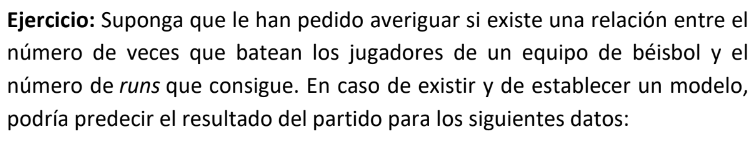

In [12]:
import pandas as pd

In [13]:
# Datos
#=======================================================================
equipos = ["Texas","Boston","Detroit","Kansas","St.","New_S.","New_Y.", "Milwaukee","Colorado","Houston","Baltimore","Los_An.","Chicago", 
"Cincinnati","Los_P.","Philadelphia","Chicago","Cleveland","Arizona","Toronto","Minnesota","Florida","Pittsburgh","Oakland","Tampa",
"Atlanta","Washington","San.F","San.I","Seattle"]

bateos = [5659, 5710, 5563, 5672, 5532, 5600, 5518, 5447, 5544, 5598,
5585, 5436, 5549, 5612, 5513, 5579, 5502, 5509, 5421, 5559,
5487, 5508, 5421, 5452, 5436, 5528, 5441, 5486, 5417, 5421]

runs = [855, 875, 787, 730, 762, 718, 867, 721, 735, 615, 708, 644, 654,
735, 667, 713, 654, 704, 731, 743, 619, 625, 610, 645, 707, 641,
624, 570, 593, 556]

datos = pd.DataFrame({'equipos': equipos, 'bateos': bateos, 'runs':runs})

In [14]:
# Obtenga la distribución de los datos
datos.describe()

,bateos,runs
count,30.000000,30.000000
mean,5523.500000,693.600000
std,79.873067,82.479088
min,5417.000000,556.000000
25%,5448.250000,629.000000
50%,5515.500000,705.500000
75%,5575.000000,734.000000
max,5710.000000,875.000000


Text(0.5, 1.0, 'Distribución de runs')

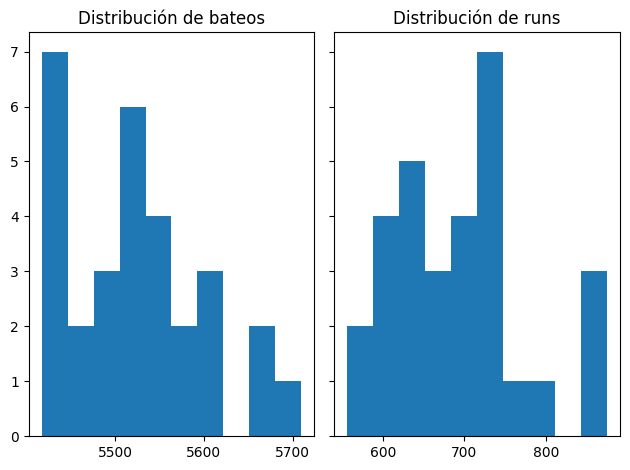

In [15]:
# Graficar distribución de los datos
import matplotlib.pyplot as plt
fig, axs = plt.subplots(1, 2, sharey=True, tight_layout=True)
axs[0].hist(datos['bateos'])
axs[1].hist(datos['runs'])
axs[0].set_title('Distribución de bateos')
axs[1].set_title('Distribución de runs')

In [16]:
# Separe sus datos de entrenamiento en 80/20.
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(datos.bateos, datos.runs, test_size=0.2, random_state=0)

In [17]:
# Ajuste un modelo de regresión lineal.
from sklearn.linear_model import LinearRegression
import numpy as np

regresion_lineal = LinearRegression() # se crea el modelo
regresion_lineal.fit(X_train.values.reshape(-1,1), y_train) # se ajusta el modelo con los datos de entrenamiento


LinearRegression()

In [18]:
# Escriba la recta de regresión que obtuvo con sus estimaciones respectivas.
coeficientes = regresion_lineal.coef_
intercepto = regresion_lineal.intercept_
r2 = regresion_lineal.score(X_test.values.reshape(-1,1), y_test)

print(f"La ecuación de la recta de regresión es: y = {coeficientes[0]} * x + {intercepto}")
print(f"El score del modelo es: {r2}")


La ecuación de la recta de regresión es: y = 0.6389747909684291 * x + -2837.776874864712
El score del modelo es: 0.5399576825420558


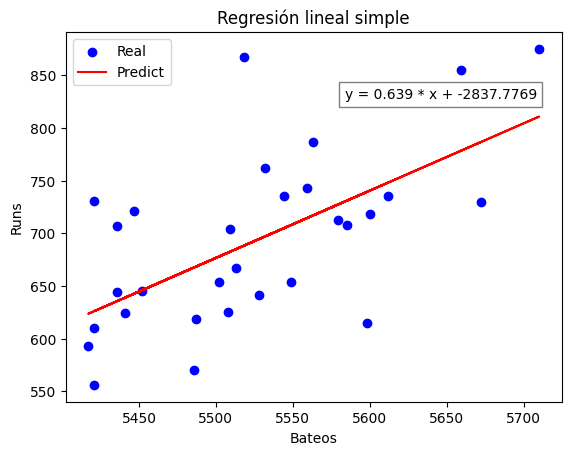

In [19]:
# Obtenga la gráfica de los datos y su recta de regresión
import matplotlib.pyplot as plt

predicion_train = regresion_lineal.predict(X_train.values.reshape(-1,1))
predicion_test = regresion_lineal.predict(X_test.values.reshape(-1,1))
predicion = regresion_lineal.predict(datos.bateos.values.reshape(-1,1))

# agregar leyenda
plt.scatter(datos['bateos'], datos['runs'], color='blue', label='Real')
plt.plot(datos['bateos'], predicion, color='red', label='Predict')
plt.title('Regresión lineal simple')
plt.xlabel('Bateos')
plt.ylabel('Runs')
plt.legend(loc='upper left')

# agregar ecuacion de la recta en el gráfico
plt.text(0.95, 0.85, 
         f"y = {round(coeficientes[0],4)} * x + {round(intercepto,4)}", 
         horizontalalignment='right', 
         verticalalignment='top', 
         transform=plt.gca().transAxes,
         bbox=dict(facecolor='white', alpha=0.5))

plt.show()


In [20]:
# 6. Obtenga las métricas: MAE, MSE, RMSE.
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae = mean_absolute_error(y_test, predicion_test)
mse = mean_squared_error(y_test, predicion_test)
rmse = np.sqrt(mse)

print(f"El Mean Absolut Error (MAE) de la regresión lineal es: {mae}")
print(f"El Mean Squared Error (MSE) de la regresión lineal es: {mse}")
print(f"El Root Mean Squared Error (RMSE) de la regresión lineal es: {rmse}")

El Mean Absolut Error (MAE) de la regresión lineal es: 37.158589869587935
El Mean Squared Error (MSE) de la regresión lineal es: 1976.597374864583
El Root Mean Squared Error (RMSE) de la regresión lineal es: 44.4589403254799


In [21]:
# Concluya con los datos obtenidos y comente la problemática que le han planteado al principio.

Se conlcuye que el modelo de regresión lineal generado permite explicar aproximadamente el 54% la variabilidad de los datos, al presentar
un coeficiente de determinación R2 de 0.5399. 

Por otro lado la distancia absoluta promedio de la recta de regresión a los datos reales es de 37.16, lo que indica que la recta generada
no es muy precisa a la hora de predecir los datos, esto se concluye a través del MAE.

De la ecuación de la recta se desprende que por cada bateo de los jugadores se espera que se anoten 0.6389 mas runs ya que el coeficiente de
la variable bateos es positivo.

En resumen, se obtiene que el modelo lineal puede predecir o explicar poco mas de la mitad de la variabilidad de los datos, por 
lo que se recomienda buscar otro modelo que pueda ajustarse mejor a los datos y que permita explicar en mayor medida dicha variabilidad. 
También se puede concluir que recopilar o agregar mas variables al set de datos inicial puede ayudar a obtener mejores predicciones, obteniendo
un modelo lineal múltiple como resultado, ya que considerar solo la cantidad de bateos de los jugadores no es suficiente para explicar la
variable de resultado runs.
